# Baseball case study

### Data description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output that we need need to predict will be a value that represents the number of wins. 

 Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

 Output: Number of predicted wins (W)

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [63]:
df= pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


By looking at the dataset we can say that all the columns contain continious data. Here 'W' is our target column.

## EDA

In [4]:
df.shape

(30, 17)

Here we have 30 rows and 17 columns to work with.

In [5]:
# checking for null values

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Here we can see no null values present in the dataset. Lets visualize it.

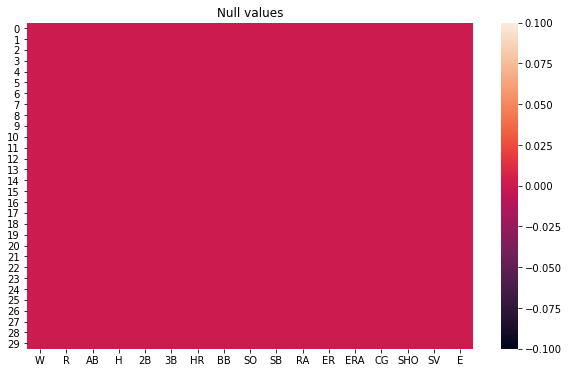

In [6]:
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

By visualization we can also see no null values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


We can see all the columns having int and float datatype. we can work with it.

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


All the columns have the same count.Also the difference between the mean and median is very less in all the columns, so the data should be normally distributed. Also there is no huge difference between the mean and the maximum, hence the the dataset is less prone to outliers.

## Visualization

<function matplotlib.pyplot.show(*args, **kw)>

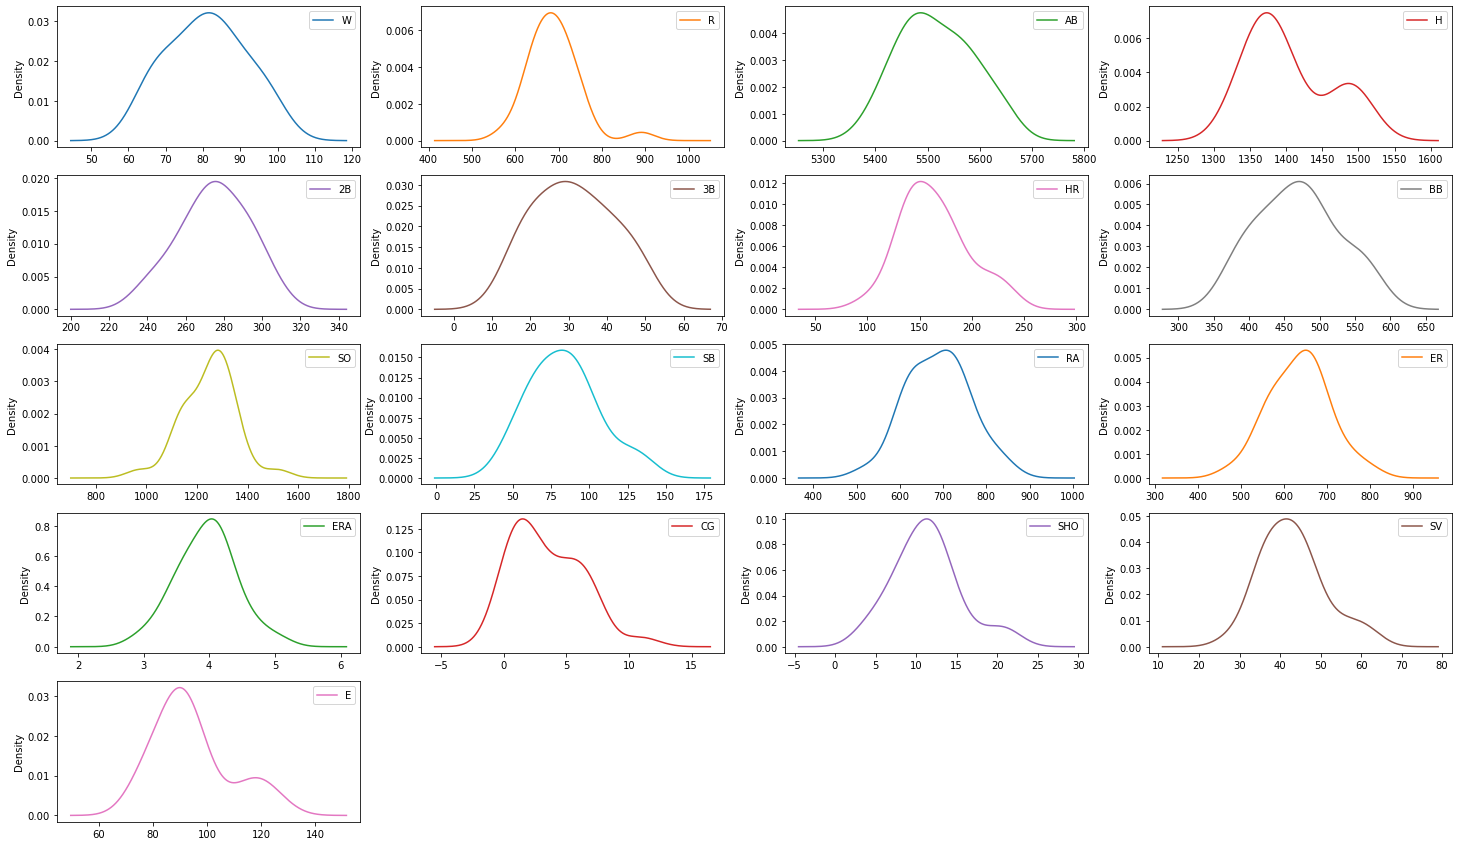

In [12]:
df.plot(kind='density', subplots= True, layout=(5,4),sharex=False, legend=True, figsize=[25,15])
plt.show

We can check the distribution of all the columns. most of the columns show a normal distribution. lets check closely.

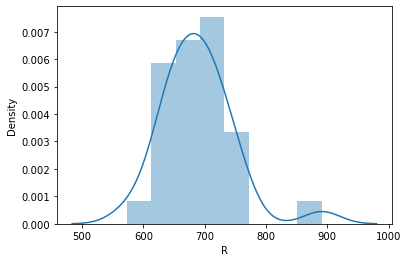

In [13]:
sns.distplot(df['R']);

We can see a normal distribution, yet at the end some skewness can be seen.

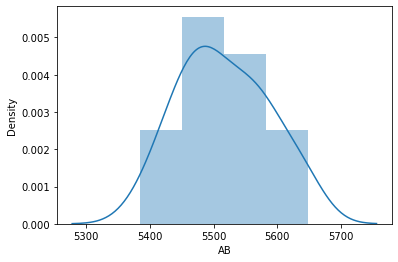

In [14]:
sns.distplot(df['AB']);

Here we have a very near to bell shaped curve distribution.

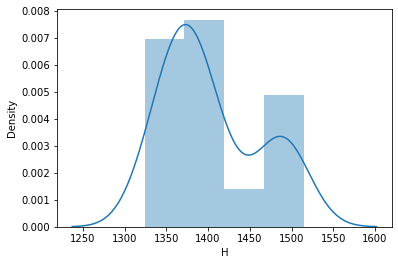

In [15]:
sns.distplot(df['H']);

Here the data has some variance.

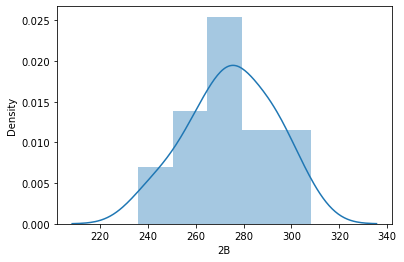

In [16]:
sns.distplot(df['2B']);

In this data a little bit of skewness can be seen(left tailed)

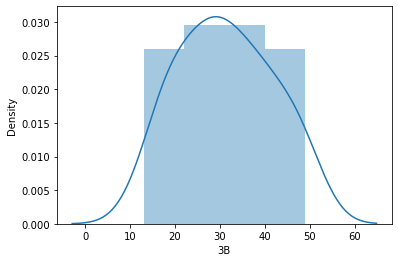

In [17]:
sns.distplot(df['3B']);

Here we have a normal distribution, very close to bell shaped curve.

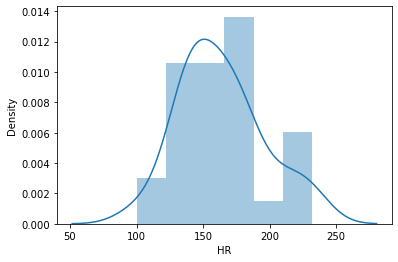

In [18]:
sns.distplot(df['HR']);

The data here is near to normally distributed with very less variance.

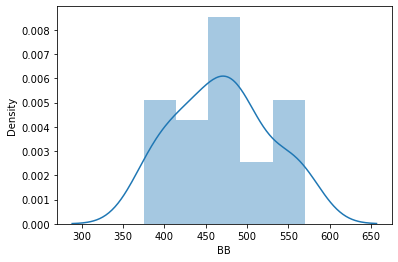

In [25]:
sns.distplot(df['BB']);

Here we can see some variance in the data

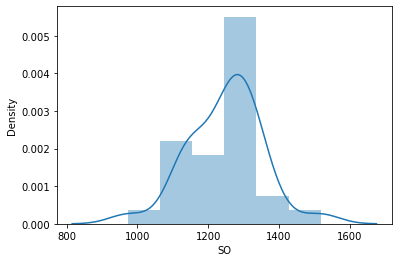

In [28]:
sns.distplot(df['SO']);

The data here has some skewness, left skewed.also has some variance

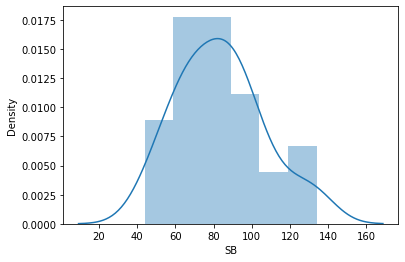

In [19]:
sns.distplot(df['SB']);

The data here is normally distributed with very less variance

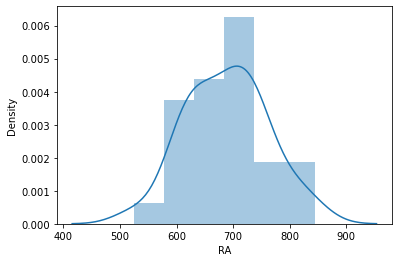

In [29]:
sns.distplot(df['RA']);

Data here is close to normal distribution

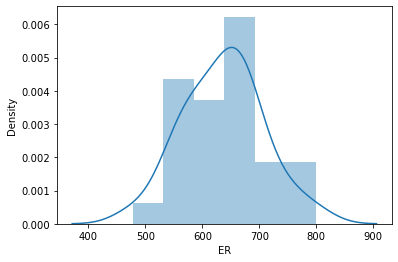

In [20]:
sns.distplot(df['ER']);

Very close to normal distribution with very little variance.

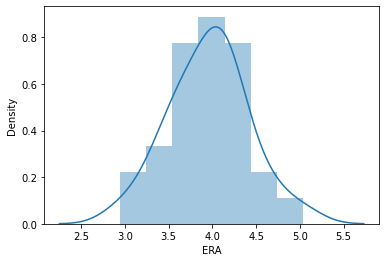

In [24]:
sns.distplot(df['ERA']);

Here we have a nice bell shaped curve, normal distribution.

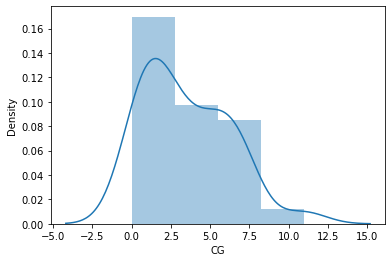

In [21]:
sns.distplot(df['CG']);

Some variance and skewness can be seen(right skewed)

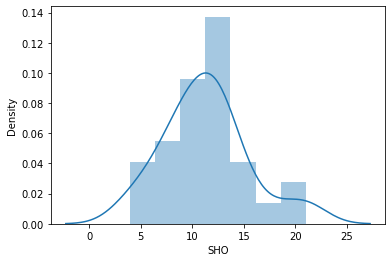

In [22]:
sns.distplot(df['SHO']);

We have some variance and skewness at the end.

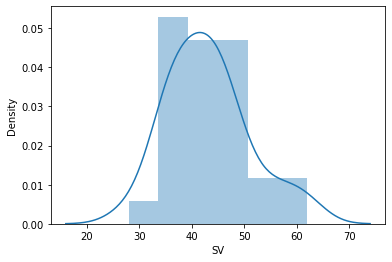

In [31]:
sns.distplot(df['SV']);

Data here is very close to normal distribution. with very little variance.

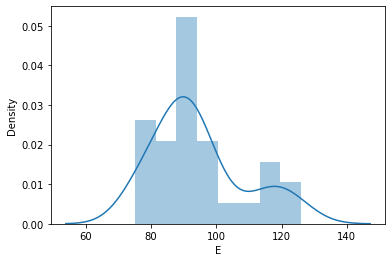

In [23]:
sns.distplot(df['E']);

Data here has some variance and skewness(right skewed)

### Checking correlation

In [32]:
cor= df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Here we can see the correlation between all the columns, lets visualize it.

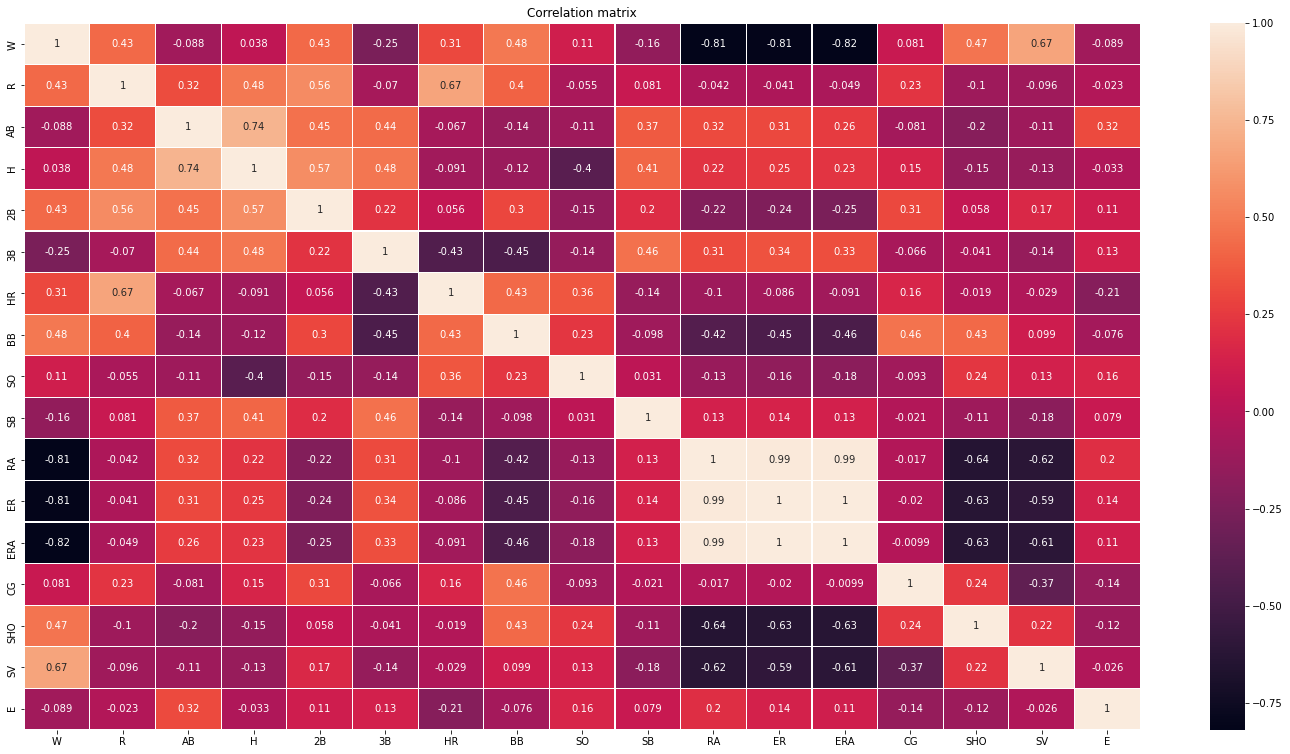

In [33]:
plt.figure(figsize=[25,13])
sns.heatmap(cor, annot=True,linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

We can see in the dataset some very positive correlation and some negative correlation as well.e.g RA is very positively correlated
with ER and ERA, and among other independent columns we can see RA having a negative relation with SHO. 

In [34]:
# checking correlation of target with independent columns.

cor['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

We can check the correlation of our target with the independent columns. lets visualize it for better understanding.

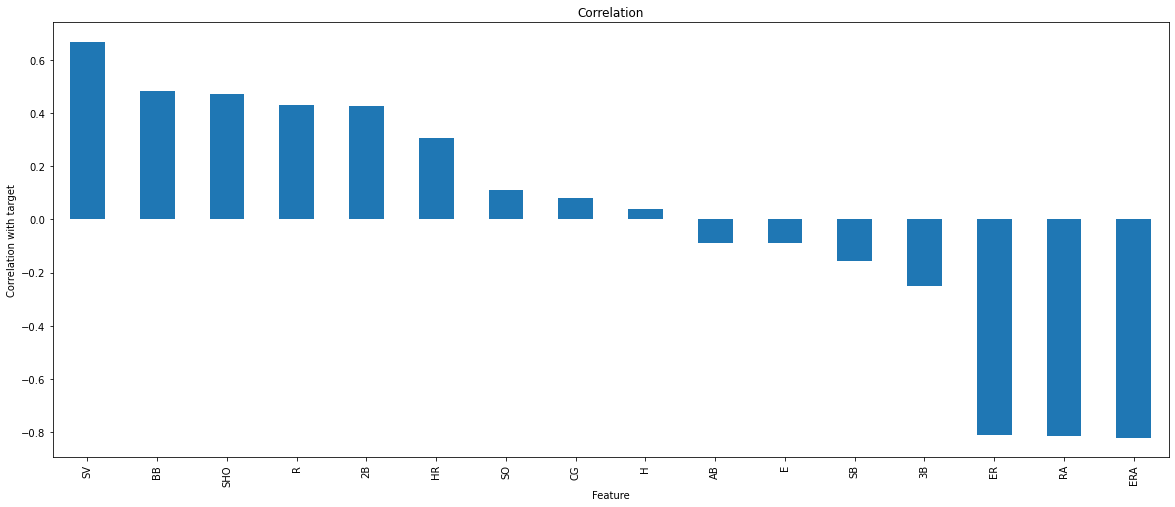

In [37]:
plt.figure(figsize=(20,8))
cor['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation with target')
plt.title('Correlation')
plt.show()

We can see SV, BB and SHO have good correlation with the target, SV having the highest. and the columns ER RA and ERA having a very negative correlation with our target. But we cannot drop these columns as it will lead to data loss.

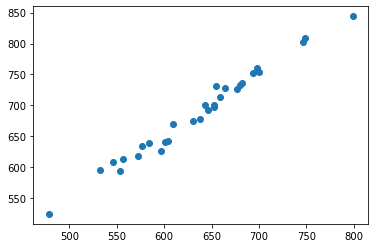

In [38]:
plt.scatter(df['ER'],df['RA'])
plt.show()

Here we have a very positive correlation

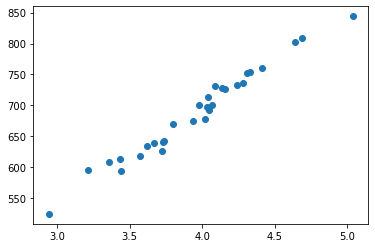

In [39]:
plt.scatter(df['ERA'],df['RA'])
plt.show()

A very positive correlation

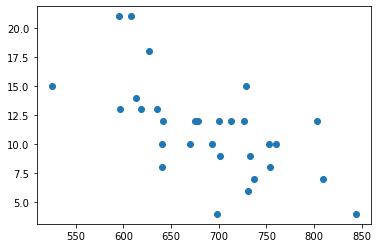

In [40]:
plt.scatter(df['RA'],df['SHO'])
plt.show()

Here we have a negative correlation

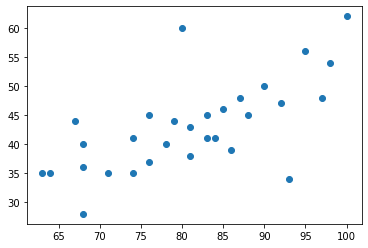

In [41]:
plt.scatter(df['W'],df['SV'])
plt.show()

We have a decent positive correlation with few points far away.

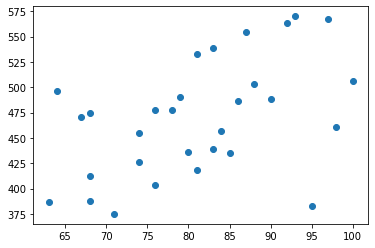

In [42]:
plt.scatter(df['W'],df['BB'])
plt.show()

A positive correlation overall with the points little scattered.

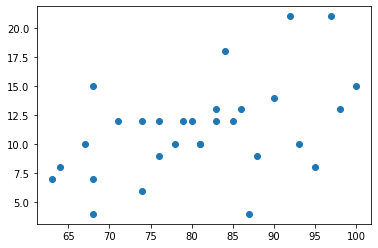

In [44]:
plt.scatter(df['W'],df['SHO'])
plt.show()

Little correlation with points scattered.

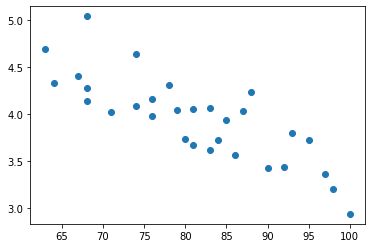

In [45]:
plt.scatter(df['W'],df['ERA'])
plt.show()

A negative correlation with the graph going down.

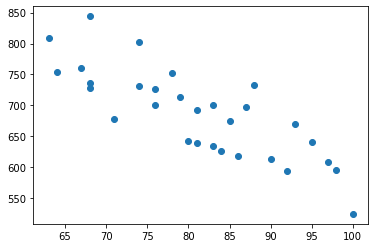

In [46]:
plt.scatter(df['W'],df['RA'])
plt.show()

A negatibe correlation with graph going down.

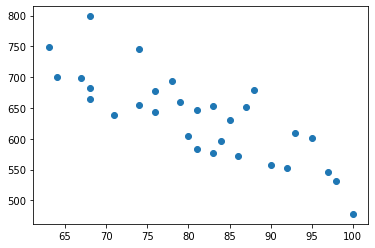

In [47]:
plt.scatter(df['W'],df['ER'])
plt.show()

A similar negative correlation.

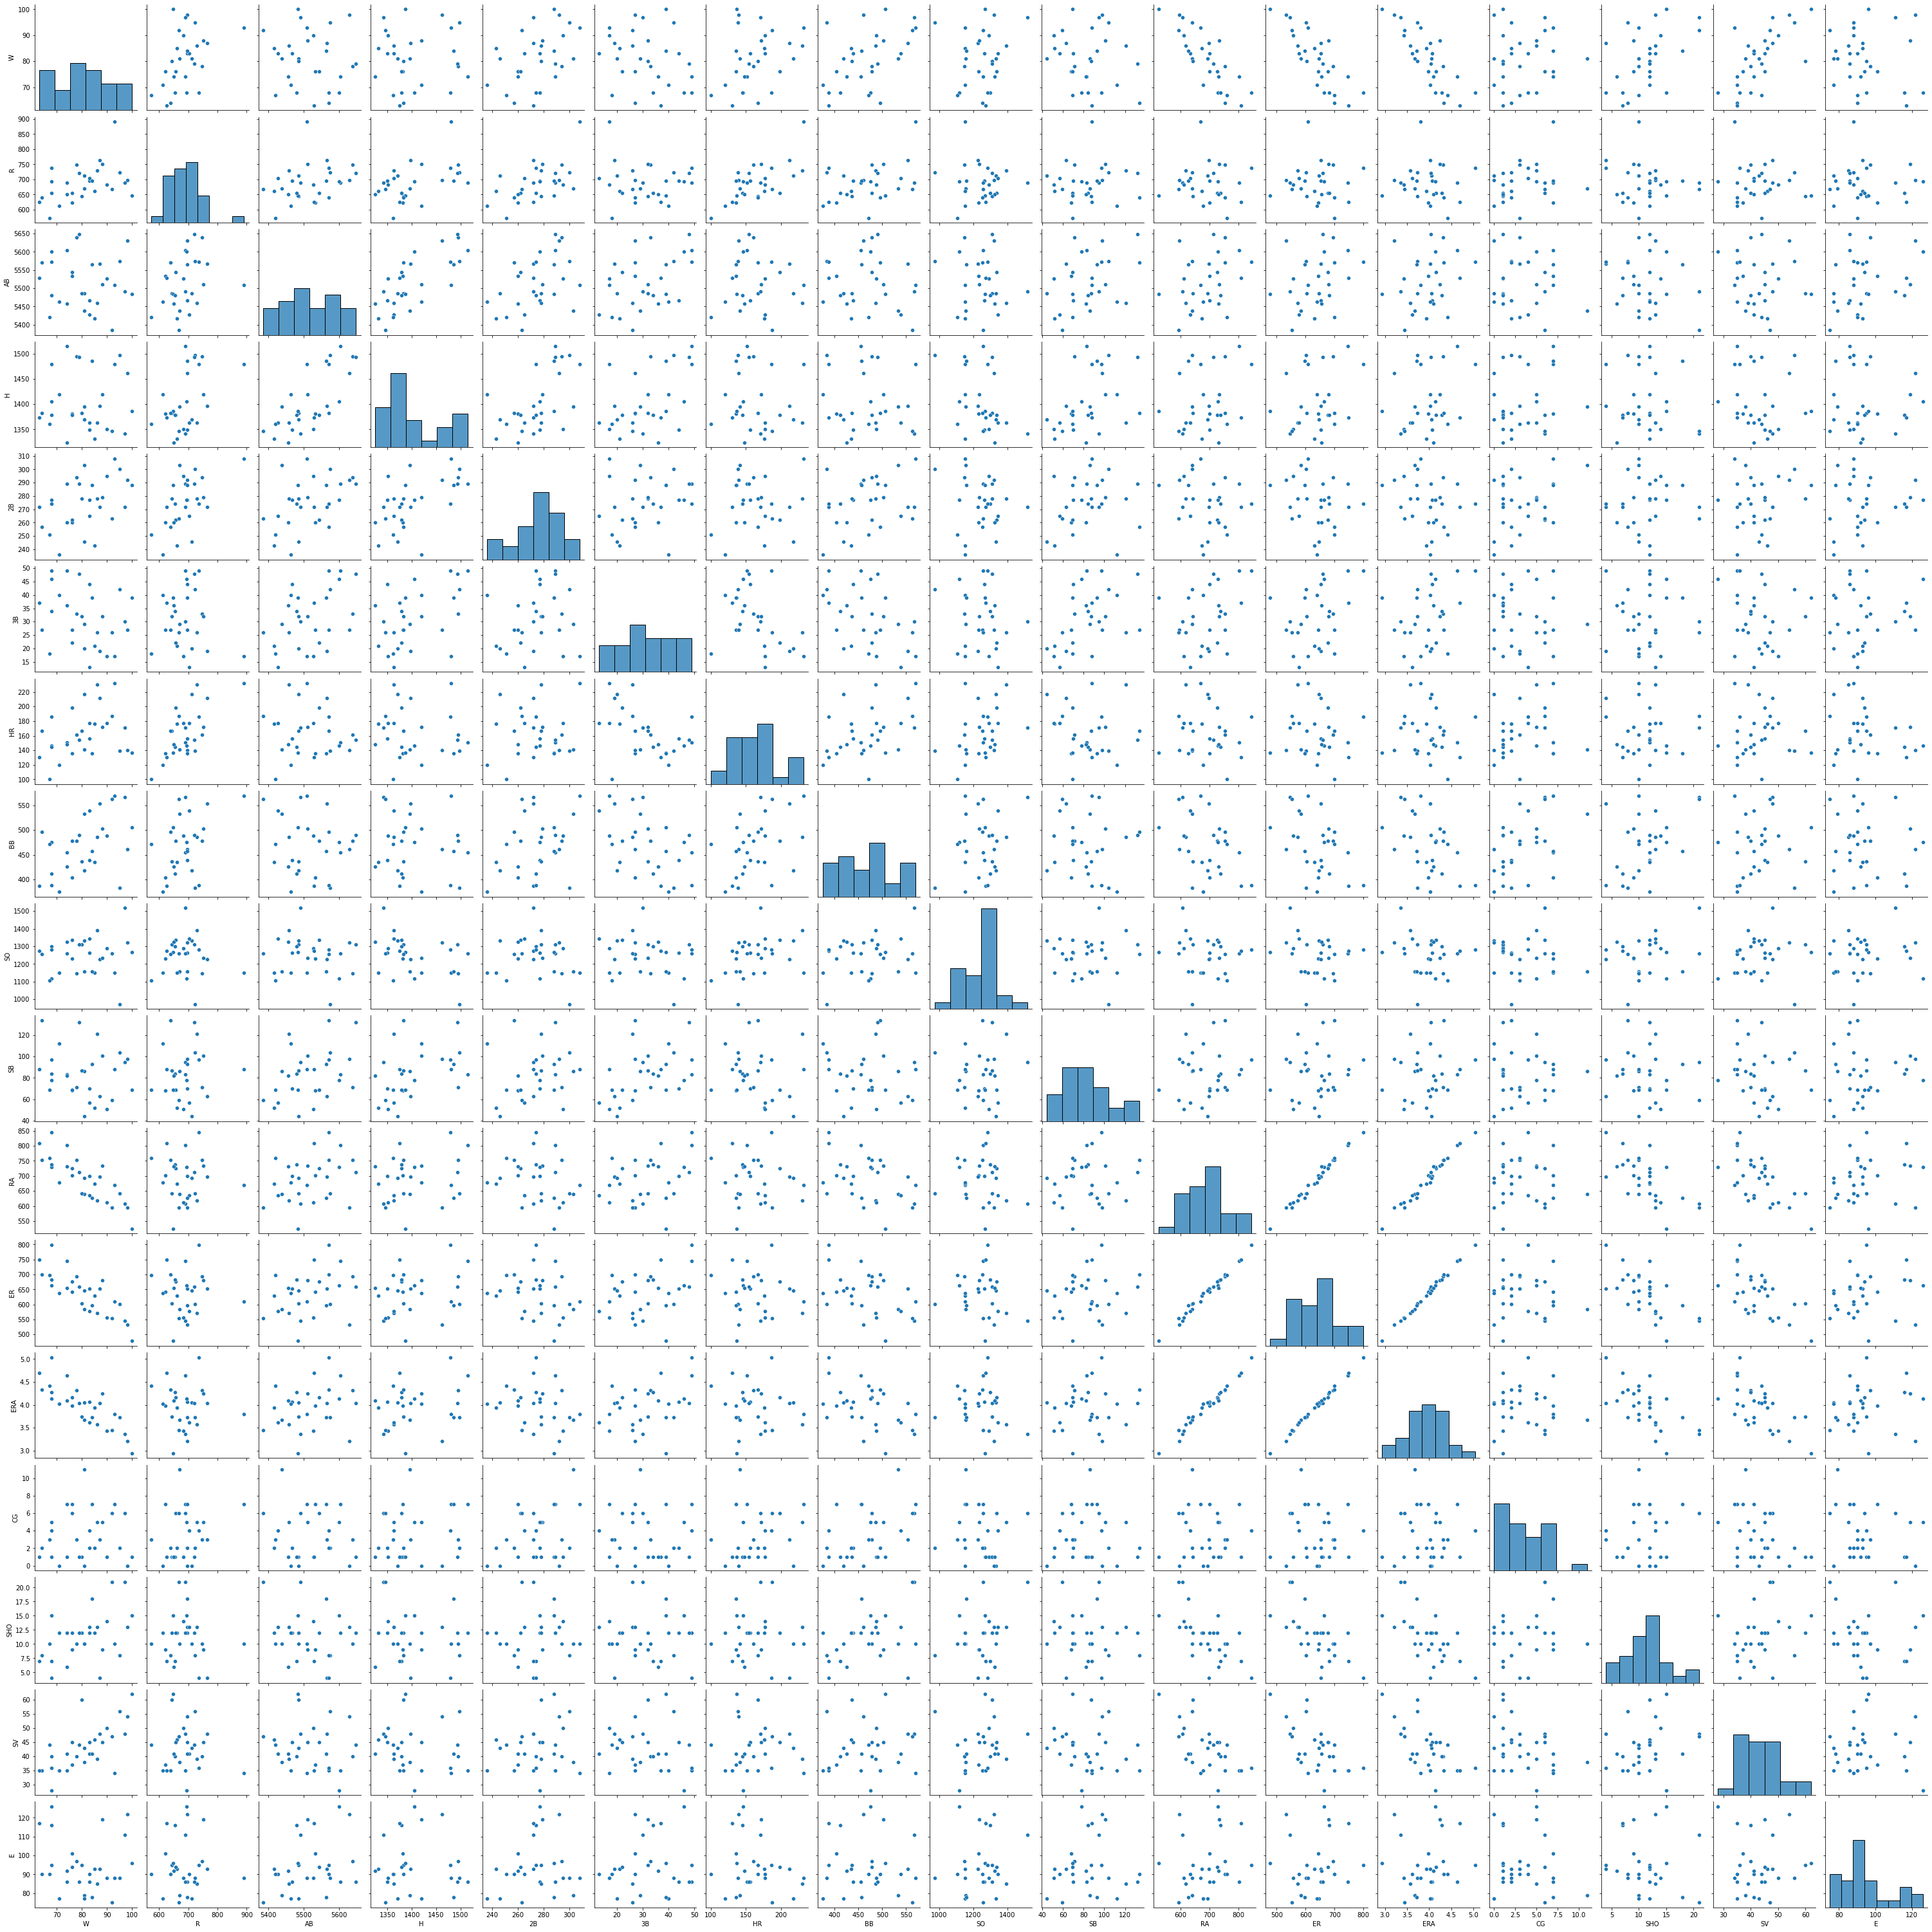

In [48]:
sns.pairplot(df);

Here we have the correlation of the entire dataset. a multivariate analysis.

## Checking outliers

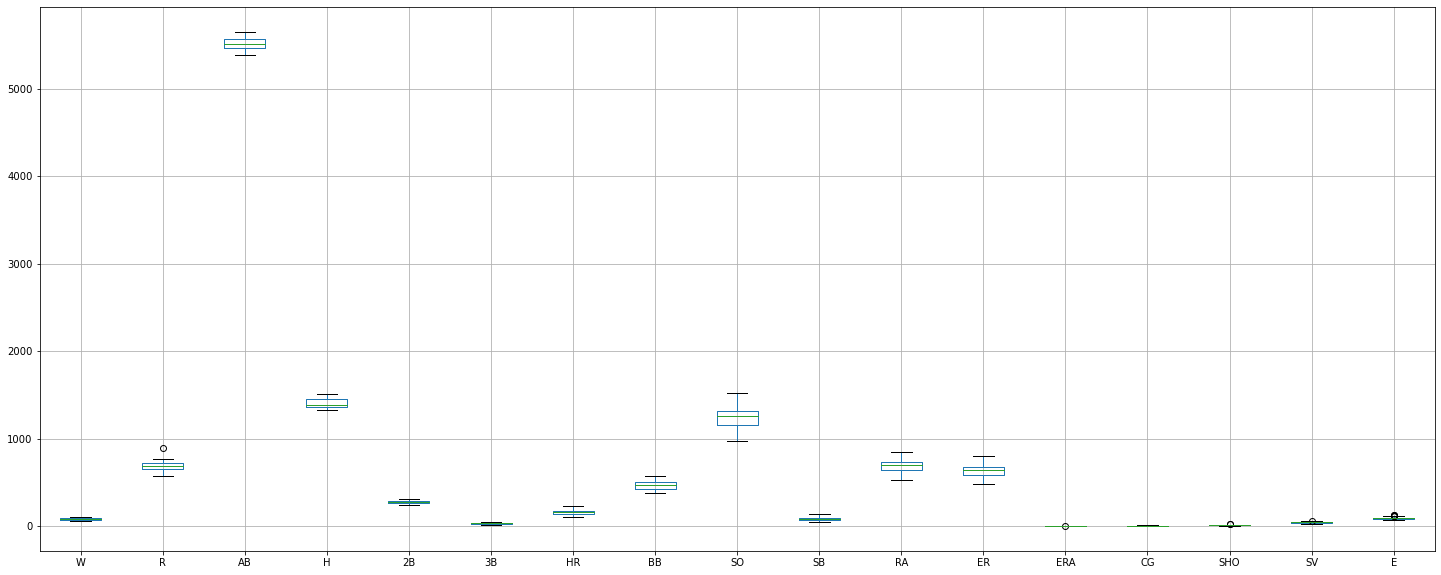

In [51]:
df.boxplot(figsize=(25,10))
plt.show()

We have the boxplot for all the columns, lets inspect closely.

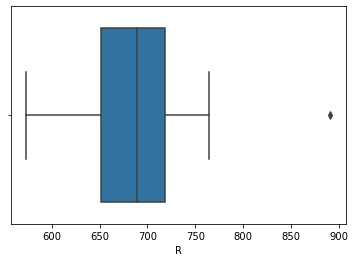

In [52]:
sns.boxplot(df['R'])

Here we can see only one outlier.

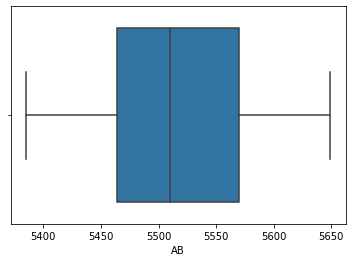

In [53]:
sns.boxplot(df['AB'])

No outliers can be seen

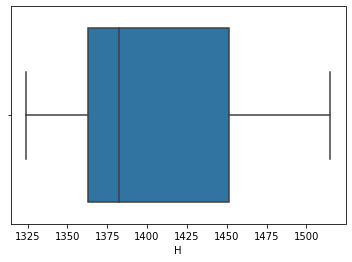

In [54]:
sns.boxplot(df['H'])

No outliers present.

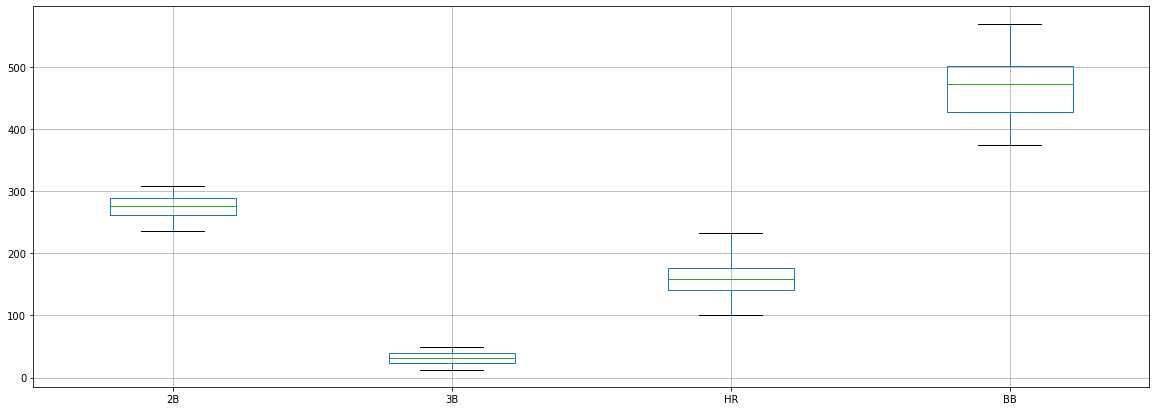

In [56]:
df.iloc[:,4:8].boxplot(figsize=[20,7])
plt.show()

Here too no outliers can be seen.

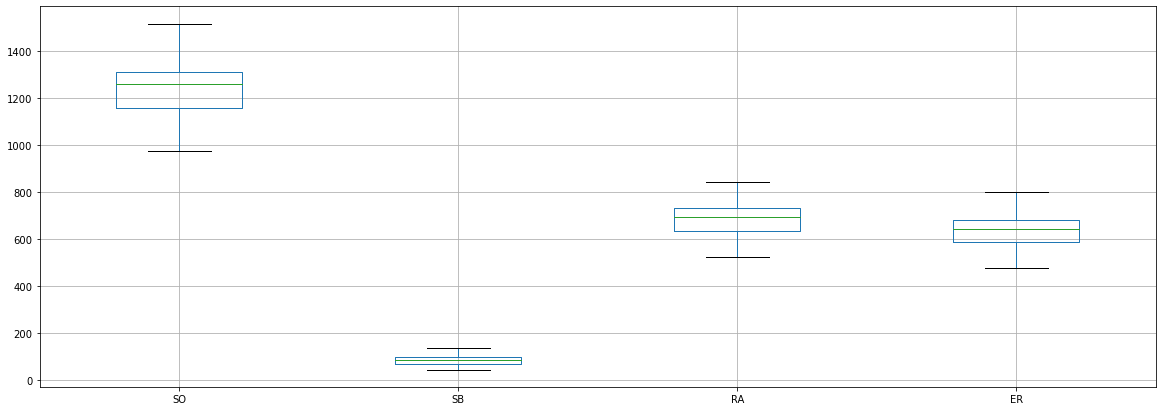

In [58]:
df.iloc[:,8:12].boxplot(figsize=[20,7])
plt.show()

No outliers present.

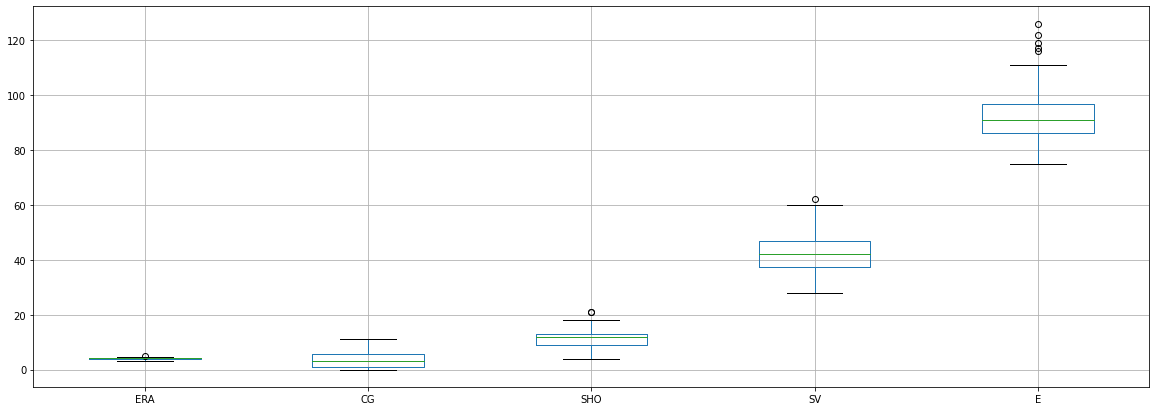

In [62]:
df.iloc[:,12:17].boxplot(figsize=[20,7])
plt.show()

Some outliers can be seen. lets inspect closely

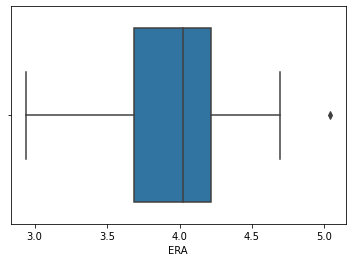

In [63]:
sns.boxplot(df['ERA'])

We have one outlier here. and is very close to the threshold.

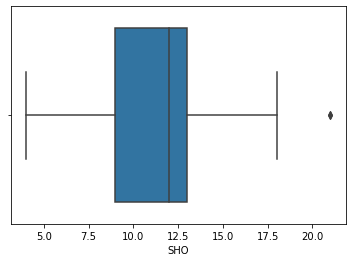

In [64]:
sns.boxplot(df['SHO'])

One outlier present and close to the threshold.

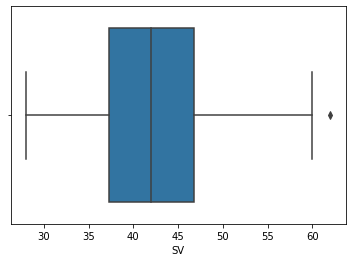

In [65]:
sns.boxplot(df['SV'])

Here also only one outlier and very close to threshold.

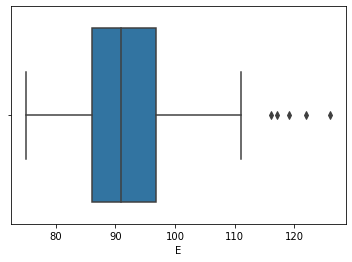

In [66]:
sns.boxplot(df['E'])

Few outliers can be seen here but are very close to the threshold.

Analysing the dataset we can say that there are very few outliers present and those present are very close to the threshold, hence we need not
remove the outliers as it will also lead to dataloss.

### Checking skewness

In [83]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

We can see some skewness present in few columns, taking threshold of(<0.5 and >-0.5). lets treat them.

In [3]:
# before treating skewness. lets split data into x and y

x= df.drop('W', axis=1)
y= df['W']

In [4]:
from sklearn.preprocessing import power_transform

for i in x.columns:
    if x[i].skew()>0.5:
        x[i]= power_transform(x[i].values.reshape(-1,1))
        
    if x[i].skew()<-0.5:
        x[i]=power_transform(x[i].values.reshape(-1,1))
x.skew()

R      0.000000
AB     0.183437
H      0.000000
2B    -0.230650
3B     0.129502
HR    -0.000065
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

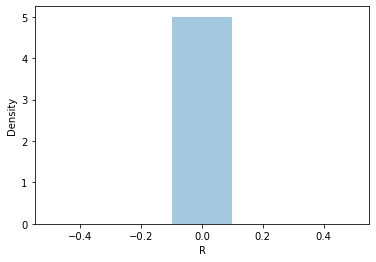

In [197]:
sns.distplot(x['R']);

One of the columns is left with only null value. we have to try some other technique.

In [108]:
x= df.drop('W', axis=1)
y= df['W']

In [109]:
x= np.cbrt(x)  # cbrt transformation applied on entire x gave us the best accuracy (by hit and trial).
x.skew()

R      0.892970
AB     0.168524
H      0.642599
2B    -0.327033
3B    -0.239420
HR     0.175310
BB     0.018373
SO    -0.412629
SB     0.049734
RA    -0.144389
ER    -0.165952
ERA   -0.195423
CG    -1.043632
SHO   -0.280283
SV     0.325143
E      0.719735
dtype: float64

The skwness is removed and minimized. lets proceed.

## Scaling

In [110]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x1= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x1

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.650959,0.849480,1.654199,1.390821,1.020276,-0.775226,-1.599063,-2.867355,0.938339,-0.644251,-0.475370,-0.475581,-0.129928,-0.761400,1.613814,-0.439228
1,0.164710,-0.709505,-0.978027,0.147858,1.172227,-0.186932,-0.508344,0.180089,-0.548612,0.198670,0.281595,0.288243,-0.129928,0.286108,0.309786,-0.597785
2,-0.316685,-1.117032,-0.140129,1.548207,-0.109000,-0.703608,1.130373,-0.879964,0.200050,-0.658975,-0.732283,-0.615140,1.577680,-0.202465,-0.635224,-1.172913
3,-1.186544,0.245621,-0.393166,-0.815822,-0.311288,-0.883952,-1.178311,-0.140241,-0.649970,0.212541,0.139231,0.090327,1.026728,-0.471558,-0.779477,0.536947
4,0.041117,1.278953,1.962309,0.804597,1.532952,-0.355325,-0.213911,0.131915,0.067222,1.563173,1.540791,1.478476,1.026728,0.286108,-1.075974,-0.597785
5,3.317778,-0.100814,1.360930,1.808223,-1.510519,2.018459,1.722354,-0.941309,0.286894,-0.223750,-0.356145,-0.314640,1.026728,-0.202465,-1.228473,-0.439228
6,1.324315,0.734693,-0.104119,-0.131384,-1.238850,1.491597,1.469604,-0.179456,-0.912375,0.170888,0.267424,0.200644,0.193025,-2.254690,0.684787,-0.053077
7,0.461454,-0.448257,-0.593183,-1.641496,-1.110132,1.626318,-0.905852,0.813696,-2.059995,0.101201,0.182094,0.244516,-2.361588,-0.202465,0.050428,-1.343444
8,-0.774111,-0.448257,-0.356913,0.203303,0.177676,0.171256,-0.564343,0.617438,0.243638,-0.629542,-0.430538,-0.452467,-0.590319,0.286108,2.045334,0.097506
9,1.057861,1.778073,1.619812,1.072874,0.269237,-0.022099,0.197479,-0.972062,-0.498655,0.916361,0.850552,0.802135,0.193025,-0.202465,-0.354140,0.245991


Our data is scaled. now lets proceed.

## Finding best random state

In [111]:
maxscr=0
maxrs=0
for i in range(1,150):
    x_train,x_test,y_train,y_test= train_test_split(x1,y, test_size=.25,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= r2_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.9469504590184064 on random state 19


We found the best score for random state 19

In [112]:
# Creating train test split using best random state

x_train,x_test,y_train,y_test= train_test_split(x1,y, test_size=.25,random_state=19)

## Model creation

In [113]:
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)
print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))
print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

Score:  0.9471695947365677
r2 score:  0.9469504590184064
Mean absolute error: 2.055850845441686
Mean squared error: 5.204657309741035
Root mean squared error: 2.281371804362681


In [114]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)
print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))

Score:  1.0
r2 score:  0.3145405319318363
Mean absolute error: 7.0
Mean squared error: 67.25
Root mean squared error: 8.200609733428363


In [115]:
from sklearn.ensemble import RandomForestRegressor
fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)
print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))
print('Mean absolute error:', mean_absolute_error(y_test,predfr))
print('Mean squared error:', mean_squared_error(y_test,predfr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predfr)))

Score:  0.909381503964321
r2 score:  0.6523792960662524
Mean absolute error: 4.775
Mean squared error: 34.104850000000006
Root mean squared error: 5.839935787318214


In [116]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)
print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))
print('Mean absolute error:', mean_absolute_error(y_test,preds))
print('Mean squared error:', mean_squared_error(y_test,preds))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preds)))

Score:  0.1943541159375033
r2 score:  -0.03622794842006227
Mean absolute error: 8.982018165431938
Mean squared error: 101.66367637702454
Root mean squared error: 10.082840689856432


In [117]:
# Regularization

from sklearn.linear_model import Lasso

ls= Lasso()
ls.fit(x_train,y_train)
predls= ls.predict(x_test)
print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predls))
print('Mean absolute error:', mean_absolute_error(y_test,predls))
print('Mean squared error:', mean_squared_error(y_test,predls))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predls)))

Score:  0.870912912887148
r2 score:  0.8989439373520102
Mean absolute error: 2.5035932469415236
Mean squared error: 9.914547146355128
Root mean squared error: 3.148737389233203


In [118]:
from sklearn.linear_model import Ridge

rd= Ridge()
rd.fit(x_train,y_train)
predrd= rd.predict(x_test)
print('Score: ',rd.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrd))
print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error:', mean_squared_error(y_test,predrd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrd)))

Score:  0.9233834592366518
r2 score:  0.9089319196506453
Mean absolute error: 2.287385086037828
Mean squared error: 8.93463244552497
Root mean squared error: 2.989085553396719


Here linear reg., lasso and ridge are giving us the best score and less errors. lets check cv score for over and under fitting.

## Checking cross validation score

In [119]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x1,y,cv=5)
print('cross validation score for linear reg model: ', scr.mean())

cross validation score for linear reg model:  -0.2685953784729829


In [120]:
scr= cross_val_score(dt,x1,y,cv=5)
print('cross validation score for Decision tree reg model: ', scr.mean())

cross validation score for Decision tree reg model:  -2.043318144411173


In [121]:
scr= cross_val_score(fr,x1,y,cv=5)
print('cross validation score for Random forest reg model: ', scr.mean())

cross validation score for Random forest reg model:  -0.6803383760700636


In [122]:
scr= cross_val_score(svr,x1,y,cv=5)
print('cross validation score for support vector reg model: ', scr.mean())

cross validation score for support vector reg model:  -0.38498630769402487


In [124]:
scr= cross_val_score(ls,x1,y,cv=5)
print('cross validation score for lasso reg model: ', scr.mean())

cross validation score for lasso reg model:  0.5741964545173456


In [123]:
scr= cross_val_score(rd,x1,y,cv=5)
print('cross validation score for ridge reg model: ', scr.mean())

cross validation score for ridge reg model:  0.3966901745114889


Clearly there was overfitting in linear reg. model. and the difference between r2 score and cv score is less in lasso as comapred to ridge. So we make it our final model. 

## Hyper parameter tuning

In [125]:
from sklearn.model_selection import GridSearchCV

par= {'alpha':[.0001,.001,.01,.1,1,10]}

gcvls= GridSearchCV(ls,par,cv=5) 
gcvls.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [126]:
gcvls.best_params_

{'alpha': 1}

In [127]:
# Now using the above parameter which is found to be best, we create our model.

finalmodel= Lasso(alpha= 1, random_state=19)
finalmodel.fit(x_train,y_train)
predf=finalmodel.predict(x_test)
print('Score: ',finalmodel.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predf))
print('Mean absolute error:', mean_absolute_error(y_test,predf))
print('Mean squared error:', mean_squared_error(y_test,predf))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predf)))

Score:  0.870912912887148
r2 score:  0.8989439373520102
Mean absolute error: 2.5035932469415236
Mean squared error: 9.914547146355128
Root mean squared error: 3.148737389233203


With the final model we are getting a train score of 87% and an r2 score of nearby 90%. with the errors being very less.

## Saving the model

In [128]:
import joblib

joblib.dump(finalmodel,'Baseball.pkl')

['Baseball.pkl']